In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from src.utils import tqdm

### Data processing and analysis

#### Data loading

In [3]:
from src.data_loading import iter_reviews

for i, review in enumerate(iter_reviews("./data/BeerAdvocate/reviews.txt", max_reviews=2, verbose=False)):
    print(review, end="\n\n")

{'beer_name': 'Régab', 'beer_id': '142544', 'brewery_name': 'Societe des Brasseries du Gabon (SOBRAGA)', 'brewery_id': '37262', 'style': 'Euro Pale Lager', 'abv': 4.5, 'date': 1440064800, 'user_name': 'nmann08', 'user_id': 'nmann08.184925', 'appearance': 3.25, 'aroma': 2.75, 'palate': 3.25, 'taste': 2.75, 'overall': 3.0, 'rating': 2.88, 'text': 'From a bottle, pours a piss yellow color with a fizzy white head.  This is carbonated similar to soda.The nose is basic.. malt, corn, a little floral, some earthy straw.  The flavor is boring, not offensive, just boring.  Tastes a little like corn and grain.  Hard to write a review on something so simple.Its ok, could be way worse.'}

{'beer_name': 'Barelegs Brew', 'beer_id': '19590', 'brewery_name': 'Strangford Lough Brewing Company Ltd', 'brewery_id': '10093', 'style': 'English Pale Ale', 'abv': 4.5, 'date': 1235127600, 'user_name': 'StJamesGate', 'user_id': 'stjamesgate.163714', 'appearance': 3.0, 'aroma': 3.5, 'palate': 3.5, 'taste': 4.0, '

In [4]:
from src.data_loading import load_beers_breweries_users

# BeerAdvocate
ba_beers, ba_breweries, ba_users = load_beers_breweries_users("./data/BeerAdvocate")
print(ba_beers.shape, ba_breweries.shape, ba_users.shape)

# RateBeer
rb_beers, rb_breweries, rb_users = load_beers_breweries_users("./data/RateBeer")
print(rb_beers.shape, rb_breweries.shape, rb_users.shape)

(280823, 18) (16758, 4) (153704, 6)
(442081, 17) (24189, 4) (70174, 5)


#### Adding `review_count` and `avg_overall` columns for beers and users

Note that we compute `avg_overall` using only the reviews (and not the ratings).

In [5]:
from src.data_processing import add_review_columns

# BeerAdvocate
ba_beers = add_review_columns("./data/BeerAdvocate/reviews.txt", ba_beers, by="beer_id")
ba_users = add_review_columns("./data/BeerAdvocate/reviews.txt", ba_users, by="user_id")
print(ba_beers.shape, ba_breweries.shape, ba_users.shape)

# RateBeer
rb_beers = add_review_columns("./data/RateBeer/reviews.txt", rb_beers, by="beer_id")
rb_users = add_review_columns("./data/RateBeer/reviews.txt", rb_users, by="user_id")
print(rb_beers.shape, rb_breweries.shape, rb_users.shape)

100%|█████████████████████████████████████████████████| 2589586/2589586 [00:14<00:00, 181783.95it/s]


(166649, 20) (16758, 4) (62252, 8)


100%|█████████████████████████████████████████████████| 7122074/7122074 [00:36<00:00, 196314.30it/s]


(396690, 19) (24189, 4) (70172, 7)


#### Choosing RateBeer over BeerAdvocate

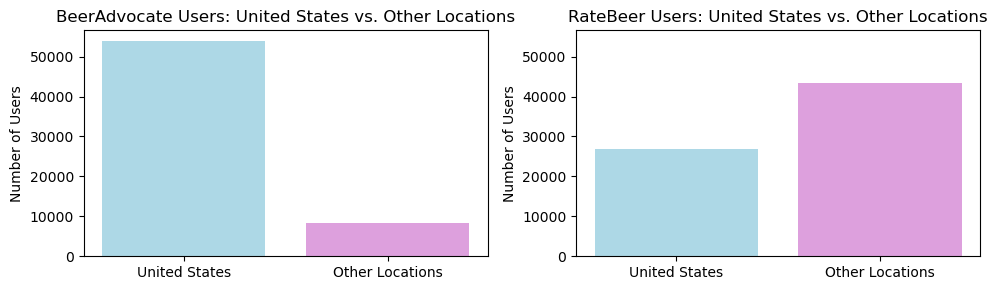

In [6]:
beeradvocate_us_users_count = ba_users['location'].str.contains('United States').sum()
ratebeer_us_users_count = rb_users['location'].str.contains('United States').sum()

beeradvocate_other_users_count = len(ba_users) - beeradvocate_us_users_count
ratebeer_other_users_count = len(rb_users) - ratebeer_us_users_count

plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.bar(['United States', 'Other Locations'], [beeradvocate_us_users_count, beeradvocate_other_users_count], color=['lightblue', 'plum'])
plt.title('BeerAdvocate Users: United States vs. Other Locations')
plt.ylabel('Number of Users')

plt.subplot(1, 2, 2, sharey=plt.gca()) # sharey to use same y axis range
plt.bar(['United States', 'Other Locations'], [ratebeer_us_users_count, ratebeer_other_users_count], color=['lightblue', 'plum'])
plt.title('RateBeer Users: United States vs. Other Locations')
plt.ylabel('Number of Users')

plt.tight_layout()
plt.show()

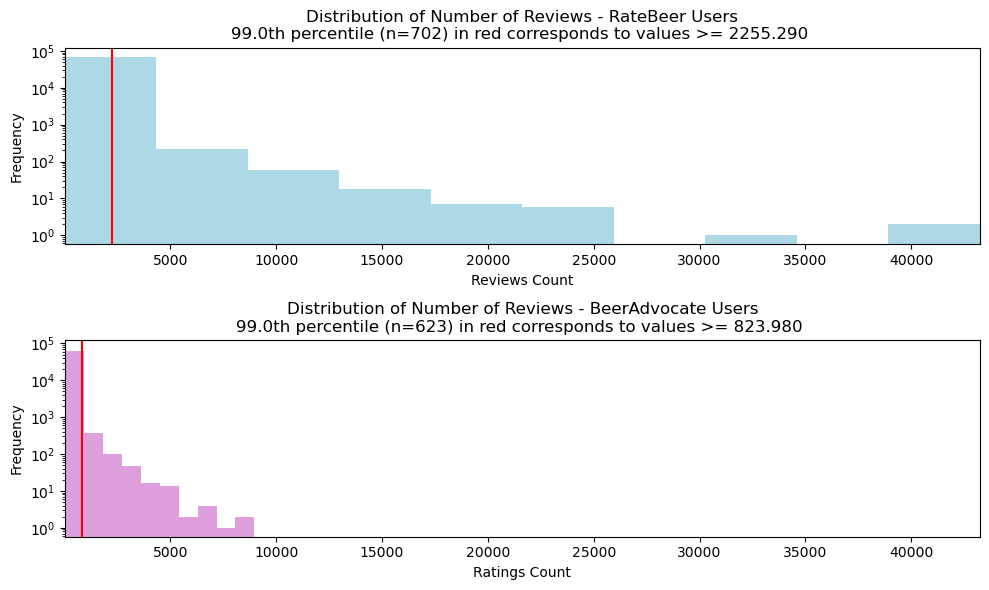

In [7]:
from src.plots import plot_histogram_with_percentile

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plot_histogram_with_percentile(
    rb_users['review_count'], 'Distribution of Number of Reviews - RateBeer Users', q=99, color="lightblue")
plt.xlabel('Reviews Count')
plt.ylabel('Frequency')
plt.yscale('log')

plt.subplot(2, 1, 2, sharex=plt.gca(), sharey=plt.gca())
plot_histogram_with_percentile(
    ba_users['review_count'], 'Distribution of Number of Reviews - BeerAdvocate Users', q=99, color="plum")
plt.xlabel('Ratings Count')
plt.ylabel('Frequency')
plt.yscale('log')

plt.xlim((
    min(np.min(rb_users['review_count']), np.min(ba_users['review_count'])),
    max(np.max(rb_users['review_count']), np.max(ba_users['review_count']))
))

plt.tight_layout()
plt.show()

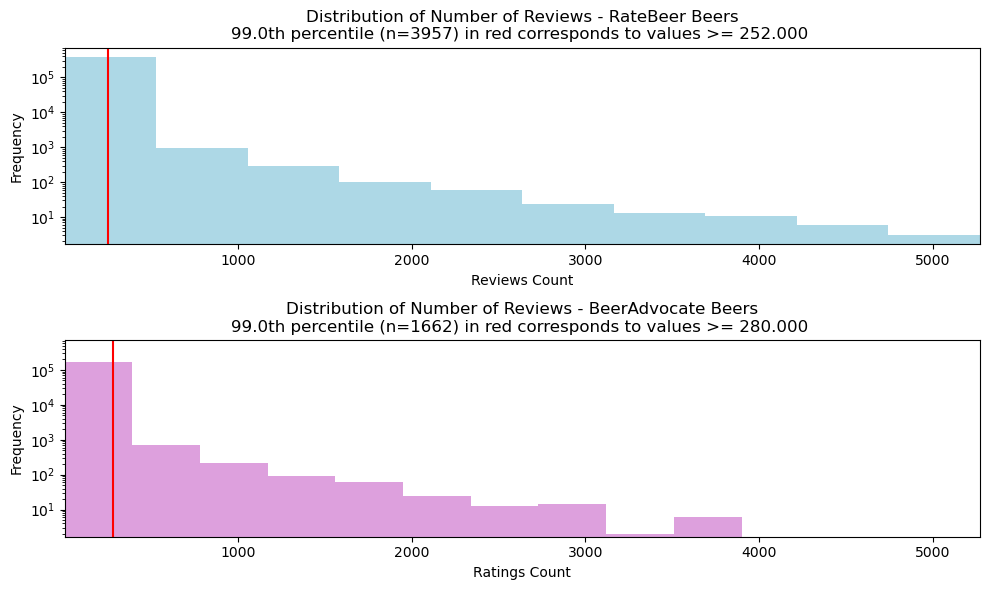

In [8]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plot_histogram_with_percentile(
    rb_beers['review_count'], 'Distribution of Number of Reviews - RateBeer Beers', q=99, color="lightblue")
plt.xlabel('Reviews Count')
plt.ylabel('Frequency')
plt.yscale('log')

plt.subplot(2, 1, 2, sharex=plt.gca(), sharey=plt.gca())
plot_histogram_with_percentile(
    ba_beers['review_count'], 'Distribution of Number of Reviews - BeerAdvocate Beers', q=99, color="plum")
plt.xlabel('Ratings Count')
plt.ylabel('Frequency')
plt.yscale('log')

plt.xlim((
    min(np.min(rb_beers['review_count']), np.min(ba_beers['review_count'])),
    max(np.max(rb_beers['review_count']), np.max(ba_beers['review_count']))
))

plt.tight_layout()
plt.show()

We choose RateBeer for 2 main reasons, visualized in the above plots :
- The user base for RateBeer is much more international and less focused on just the United States. In particular, we need this when we examine user complaints by location. While there are less users in RateBeer, they are much more active according to the 2nd plot.
- RateBeer has 7M reviews, while BeerAdvocate has 2.5M (8.3M ratings, but we only care about reviews). Additionally, beers in the RateBeer dataset have more reviews on average. This matters because we focus on beers with plenty of reviews.

Below we only work on RateBeer since that is the dataset we choose for the project.

#### Cleaning the data

- User data : We drop users with duplicate user ids. The only missing values are locations and join dates, but we don't drop these users as the reviews they wrote are still valuable even if we won't be able to visualize their location for example.
- Beer data : There are no duplicate beer ids. We drop columns with too many missing values and those that are related to reviews, which we will recompute when needed using our data, as we don't know how these columns were computed and they don't always correspond to our data. Note that we keep abv (alchohol by volume) as it will be useful for later analysis.
- Brewery data : There are no duplicate ids and no missing values, so we don't do anything.

In [9]:
duplicates_idx = rb_users.duplicated(subset='user_id', keep=False)
# save dropped users, so we can ignore their reviews later if needed
rb_users[duplicates_idx]["user_id"].to_csv("./data/RateBeer/ignore_users.csv")

In [10]:
rb_users = rb_users[~rb_users.duplicated(subset='user_id', keep=False)]
rb_users.isnull().sum()

nbr_ratings         0
user_id             0
user_name           0
joined             30
location        19575
review_count        0
avg_overall         0
dtype: int64

In [11]:
rb_beers[rb_beers.duplicated(subset='beer_id', keep=False)].shape[0]

0

In [12]:
rb_beers.isnull().sum()

beer_id                           0
beer_name                         0
brewery_id                        0
style                             0
nbr_ratings                       0
overall_score                292662
style_score                  292622
avg                            1043
abv                           36732
avg_computed                      0
zscore                       354462
nbr_matched_valid_ratings         0
avg_matched_valid_ratings    354462
id                                0
location                          0
name                              0
nbr_beers                         0
review_count                      0
avg_overall                       0
dtype: int64

In [13]:
drop_columns = [
    "overall_score", "style_score", "zscore", "nbr_matched_valid_ratings", "avg_matched_valid_ratings"
]
rb_beers = rb_beers.drop(columns=drop_columns)

In [14]:
rb_breweries[rb_breweries.duplicated(subset='id', keep=False)].shape[0]

0

In [15]:
rb_breweries.isnull().sum()

id           0
location     0
name         0
nbr_beers    0
dtype: int64

#### beers' and users' `avg_overall` by location

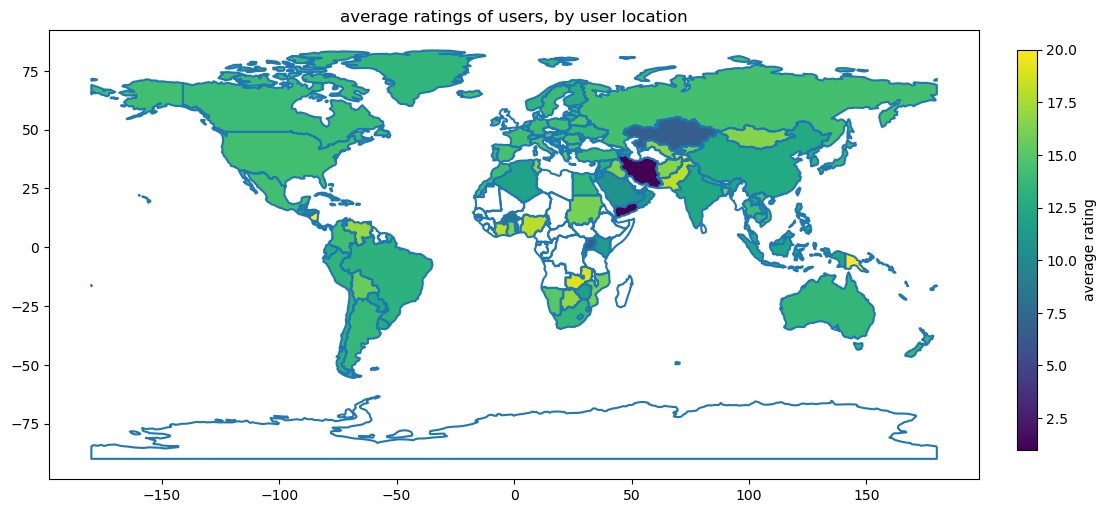

In [16]:
from src.plots import plot_avg_overall_map

plot_avg_overall_map(rb_users, "average ratings of users, by user location")

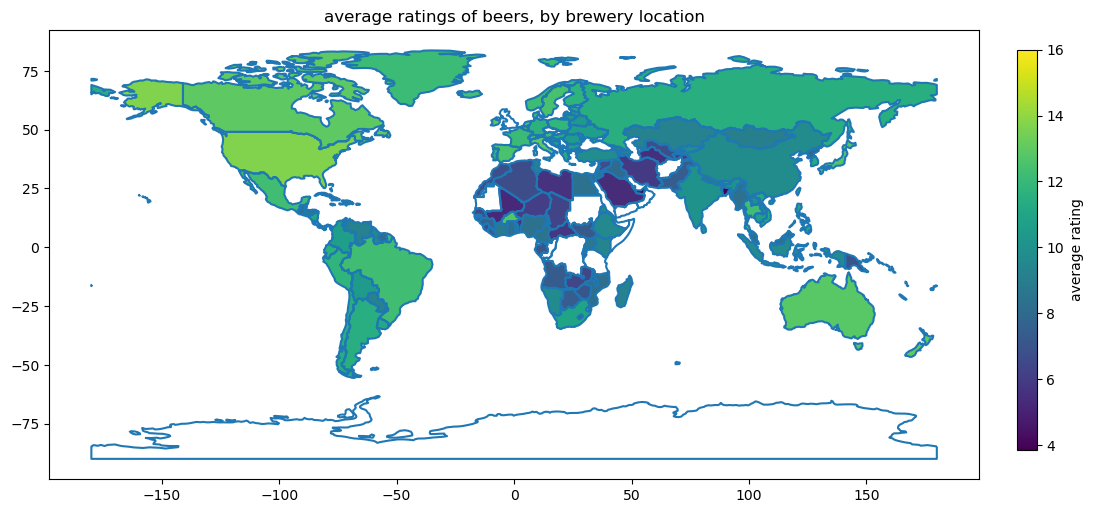

In [17]:
plot_avg_overall_map(rb_beers, "average ratings of beers, by brewery location")

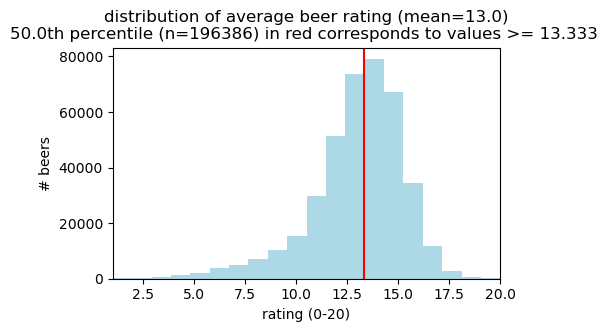

In [18]:
plt.figure(figsize=(5, 3))

plot_histogram_with_percentile(
    rb_beers["avg_overall"], f"distribution of average beer rating (mean={np.mean(rb_beers['avg_overall']):.1f})",
    q=50, bins=20, color="lightblue")

plt.xlabel("rating (0-20)")
plt.ylabel("# beers")

plt.xlim((np.min(rb_beers["avg_overall"]), np.max(rb_beers["avg_overall"])));

Looking at the `reviews.txt` file, there are 7'122'074 reviews. The `avg_overall` column of the beers dataframe corresponds to the average of the review's overall score for a beer. We then plot these average beer ratings in a histogram. The beer ratings are approximately normally distributed around the rating 13.0 (with a longer left tail), which means that they are quite varied but extreme values are rare which makes sense.

In [19]:
review_lengths = [len(review["text"].split()) for review in iter_reviews("./data/RateBeer/reviews.txt")]

100%|█████████████████████████████████████████████████| 7122074/7122074 [00:48<00:00, 147267.98it/s]


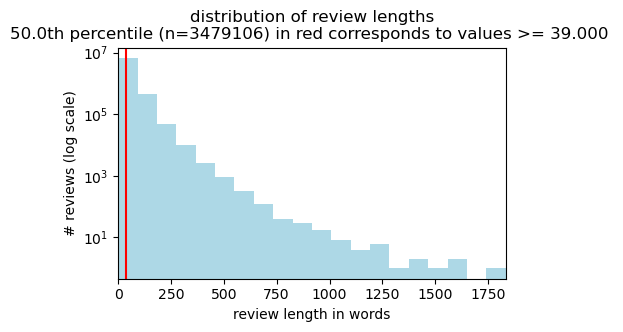

In [20]:
plt.figure(figsize=(5, 3))

plot_histogram_with_percentile(
    review_lengths, "distribution of review lengths",
    q=50, bins=20, color="lightblue")

plt.xlabel("review length in words")
plt.ylabel("# reviews (log scale)")
plt.yscale("log")

plt.xlim((np.min(review_lengths), np.max(review_lengths)));

Before analyzing the textual reviews, we need to make sure they are long enough, ie that they contain actual reviews of the beers and not just short reviews like "great beer!". In our case, the reviews are quite long and extensive, with a median word count of 39.

In [21]:
# missing data in text file
columns = (
    "beer_id", "brewery_id", "date", "abv", "appearance", "aroma", "palate",
    "taste", "overall", "rating"
)

def encode_missing(review):
    encoded = [(1 if review[col] == "" else 0) for col in columns]
    return np.array(encoded)

raw_reviews = iter_reviews("./data/RateBeer/ratings.txt", max_reviews=10, do_cast=False)
missing_counts = sum(encode_missing(review) for review in raw_reviews)

for col, missing in zip(columns, missing_counts):
    print(f"{col} -> missing {missing} values")

100%|█████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 5617.12it/s]

beer_id -> missing 0 values
brewery_id -> missing 0 values
date -> missing 0 values
abv -> missing 0 values
appearance -> missing 0 values
aroma -> missing 0 values
palate -> missing 0 values
taste -> missing 0 values
overall -> missing 0 values
rating -> missing 0 values


The reviews aren't missing any values, nothing to do here.

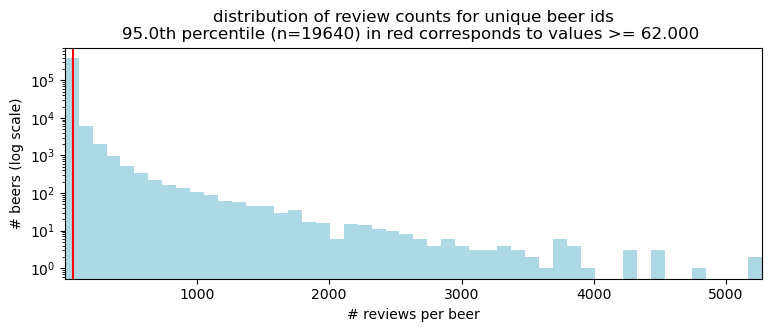

In [22]:
plt.figure(figsize=(9, 3))

plot_histogram_with_percentile(
    rb_beers["review_count"], "distribution of review counts for unique beer ids",
    q=95, bins=50, color="lightblue")

plt.xlabel("# reviews per beer")
plt.ylabel("# beers (log scale)")
plt.yscale("log")

plt.xlim((np.min(rb_beers["review_count"]), np.max(rb_beers["review_count"])));

To ensure that our results are statistically significant, we need to make sure that the beers we work on have enough reviews. We see here that this is the case, as selecting the top 5% of beers (20k) we get beers with at least 62 reviews, which is plenty to work with.

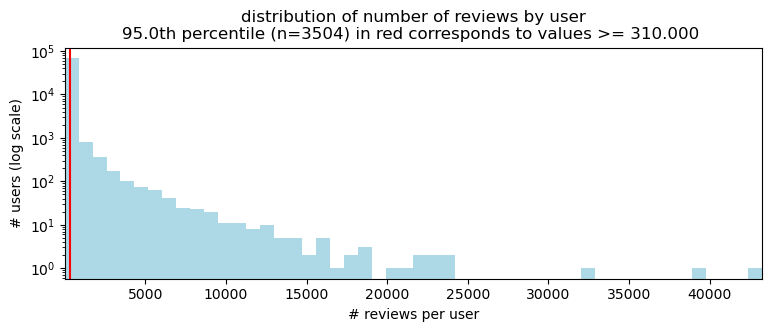

In [23]:
plt.figure(figsize=(9, 3))

plot_histogram_with_percentile(
    rb_users["review_count"], "distribution of number of reviews by user",
    q=95, bins=50, color="lightblue")

plt.xlabel("# reviews per user")
plt.ylabel("# users (log scale)")
plt.yscale("log")

plt.xlim((np.min(rb_users["review_count"]), np.max(rb_users["review_count"])));

In order to weight the contributions of reviewers, we plan to give "expert" status to a subset of users that have extensive experience in reviewing beers. As an example, we can see here that the top 5% of most active users have written 310 reviews at least, which is plenty to be called "expert". Note that we have yet to decide on a specific weighting strategy, and that we will likely change this threshold (top 5% of most active users) later, but this plot illustrates that this makes sense as a minority of users are very experienced and a majority not so much.

### Basic pipeline

#### Selecting beers with many reviews

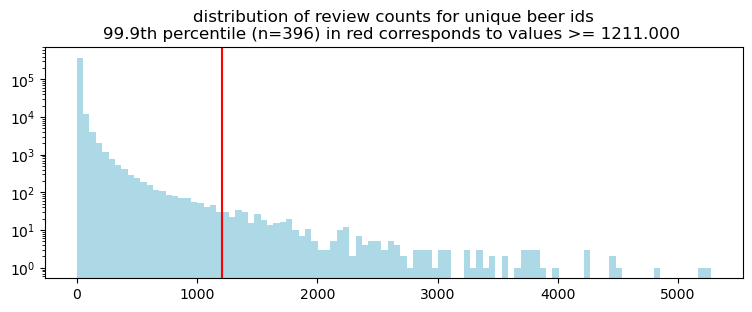

In [24]:
plt.figure(figsize=(9, 3))

threshold = plot_histogram_with_percentile(
    rb_beers["review_count"], "distribution of review counts for unique beer ids",
    q=99.9, bins=100, color="lightblue")

plt.yscale("log")

In [25]:
rb_beers

,beer_id,beer_name,brewery_id,style,nbr_ratings,avg,abv,avg_computed,id,location,name,nbr_beers,review_count,avg_overall
0,410549,33 Export (Gabon),3198,Pale Lager,1,2.72,5.0,2.000000,3198,Gabon,Sobraga,3,1,8.000000
1,105273,Castel Beer (Gabon),3198,Pale Lager,10,2.18,5.2,1.910000,3198,Gabon,Sobraga,3,10,6.900000
2,19445,Régab,3198,Pale Lager,27,1.83,4.5,1.811111,3198,Gabon,Sobraga,3,27,6.592593
3,155699,Ards Bally Black Stout,13538,Stout,6,3.18,4.6,3.866667,13538,Northern Ireland,Ards Brewing Co.,13,6,16.333333
4,239097,Ards Belfast 366,13538,Golden Ale/Blond Ale,1,2.79,4.2,3.000000,13538,Northern Ireland,Ards Brewing Co.,13,1,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396685,189684,Stela Selekt,1107,Pilsener,5,2.19,4.7,1.500000,1107,Albania,Stefani & Co,11,5,5.200000
396686,84884,Hotel Martini Donauer,9355,Pale Lager,1,2.77,NaN,2.900000,9355,Albania,Hotel Martini,1,1,12.000000
396687,93783,Birra Rozafa,9928,Pale Lager,1,2.64,NaN,2.000000,9928,Albania,Rozafa Brewery,1,1,8.000000
396688,220897,Svejk Blonde,17155,Pale Lager,4,2.70,NaN,2.500000,17155,Albania,Svejk Beer Garden,2,4,10.000000


In [26]:
beer_with_min_count = list(rb_beers[rb_beers["review_count"] > threshold]["beer_id"])
len(beer_with_min_count), len(rb_beers)

(396, 396690)

In [27]:
beer_reviews = {}

for review in iter_reviews("./data/RateBeer/reviews.txt"):
    beer_id = review["beer_id"]
    if beer_id in beer_with_min_count:
        beer_reviews.setdefault(beer_id, []).append(review)

sum(len(beer_reviews[k]) for k in beer_reviews)

100%|█████████████████████████████████████████████████| 7122074/7122074 [00:50<00:00, 141959.60it/s]


760422

In [28]:
my_beer_id = next(iter(beer_reviews))
pd.DataFrame(beer_reviews[my_beer_id]).head(2)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,Tiger Beer,3126,Singapore Brewery (Asia Pacific Breweries-Hein...,547,Pale Lager,5.0,1500112800,lokis333,375455,3.0,6.0,4.0,7.0,12.0,3.2,Golden color with medium white foam. Aromas of...
1,Tiger Beer,3126,Singapore Brewery (Asia Pacific Breweries-Hein...,547,Pale Lager,5.0,1500026400,sebsky,478504,3.0,2.0,2.0,3.0,6.0,1.6,"640 ml bottle @home,bb 31/05/2018.Golden,clear..."


#### Task 1 : extracting beer information from the reviews

In [29]:
REVIEW_COLUMNS = [
    'appearance', 'aroma', 'palate', 'taste', 'overall', 'rating'
]

def aggregate_reviews(reviews):
    reviews = pd.DataFrame(reviews)
    return reviews[REVIEW_COLUMNS].mean()

aggregate_reviews(beer_reviews[my_beer_id])

appearance    2.579692
aroma         3.875964
palate        2.370823
taste         4.231362
overall       8.327763
rating        2.138560
dtype: float64

In [30]:
if set(REVIEW_COLUMNS) & set(rb_beers.columns) != set():
    raise ValueError("review columns contain names already in the dataset, we would be overwriting data")

aggregated_reviews = []

for beer_id in beer_reviews:
    reviews = beer_reviews[beer_id]
    aggregated_data = aggregate_reviews(reviews)
    aggregated_data["beer_id"] = beer_id  # add the beer_id to match on
    aggregated_reviews.append(aggregated_data)

aggregated_reviews_df = pd.DataFrame(aggregated_reviews)

rb_beers = rb_beers.merge(aggregated_reviews_df, on="beer_id", how="inner")

print(rb_beers.shape)
rb_beers.head()

(396, 20)


,beer_id,beer_name,brewery_id,style,nbr_ratings,avg,abv,avg_computed,id,location,name,nbr_beers,review_count,avg_overall,appearance,aroma,palate,taste,overall,rating
0,3126,Tiger Beer,547,Pale Lager,1556,2.13,5.0,2.138560,547,Singapore,Singapore Brewery (Asia Pacific Breweries-Hein...,17,1556,8.327763,2.579692,3.875964,2.370823,4.231362,8.327763,2.138560
1,730,Tsingtao,116,Pale Lager,2031,2.03,4.8,2.045790,116,China,Tsingtao Brewery,54,2031,7.940423,2.397834,3.712949,2.329394,4.077302,7.940423,2.045790
2,224,Dos Equis XX Ambar (Amber),46,Amber Lager/Vienna,1741,2.45,4.7,2.469500,46,Mexico,FEMSA - Cuauhtémoc-Moctezuma (Heineken),46,1741,9.771396,3.049971,4.332567,2.647904,4.893165,9.771396,2.469500
3,225,Dos Equis XX Special Lager,46,Pale Lager,1518,2.08,4.2,2.098221,46,Mexico,FEMSA - Cuauhtémoc-Moctezuma (Heineken),46,1518,8.201581,2.519763,3.681818,2.391304,4.187747,8.201581,2.098221
4,230,Sol (Mexico),46,Pale Lager,1241,1.68,4.5,1.705721,46,Mexico,FEMSA - Cuauhtémoc-Moctezuma (Heineken),46,1241,6.413376,2.228042,3.019339,2.041096,3.355359,6.413376,1.705721


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:58<00:00, 17.05it/s]


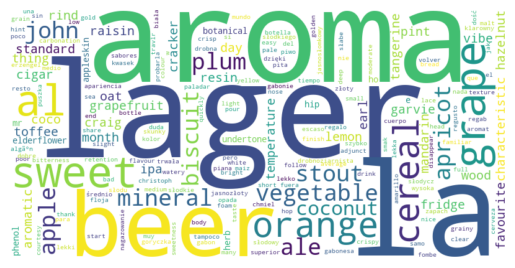

In [32]:
from src.plot_wordcloud import plot_wordcloud

plot_wordcloud()

#### Task 2 : Choosing the negative reviews

In [33]:
all_ratings = [review["rating"] for review in iter_reviews("./data/RateBeer/ratings.txt")]

100%|█████████████████████████████████████████████████| 7122074/7122074 [00:36<00:00, 192551.19it/s]


(0.0, 5.0)

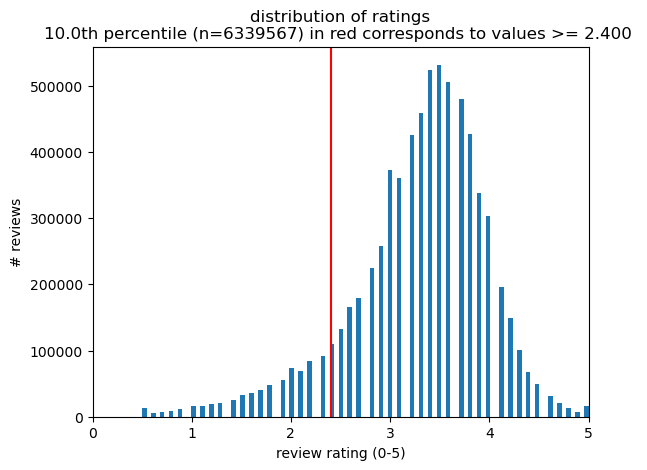

In [34]:
ratings_percentile = plot_histogram_with_percentile(all_ratings, "distribution of ratings", q=10, bins=100)

plt.xlabel("review rating (0-5)")
plt.ylabel("# reviews")
plt.xlim((0, 5))

In [35]:
min_reviews = 10
best_beer_reviews, worst_beer_reviews = {}, {}

for beer_id in beer_reviews:
    best_reviews, worst_reviews = [], []

    for review in beer_reviews[beer_id]:
        rating = review["rating"]

        if rating <= ratings_percentile:
            worst_reviews.append(review["text"])
        else:
            best_reviews.append(review["text"])

    if len(worst_reviews) > min_reviews and len(best_reviews) > min_reviews:
        best_beer_reviews[beer_id] = best_reviews
        worst_beer_reviews[beer_id] = worst_reviews

for i, beer_id in enumerate(worst_beer_reviews):
    print(f"{beer_id} went from {len(beer_reviews[beer_id])} total reviews to",
          f"{len(worst_beer_reviews[beer_id])} negative reviews")
    if i - 1 >= 15:
        break

3126 went from 1556 total reviews to 1132 negative reviews
730 went from 2031 total reviews to 1567 negative reviews
224 went from 1741 total reviews to 857 negative reviews
225 went from 1518 total reviews to 1108 negative reviews
230 went from 1241 total reviews to 1084 negative reviews
226 went from 1250 total reviews to 1067 negative reviews
742 went from 3650 total reviews to 3038 negative reviews
744 went from 1311 total reviews to 1018 negative reviews
745 went from 2246 total reviews to 646 negative reviews
746 went from 1382 total reviews to 1021 negative reviews
237 went from 1403 total reviews to 1041 negative reviews
8820 went from 1650 total reviews to 65 negative reviews
1929 went from 1677 total reviews to 19 negative reviews
13558 went from 1550 total reviews to 76 negative reviews
1094 went from 3052 total reviews to 43 negative reviews
13815 went from 1581 total reviews to 11 negative reviews
1921 went from 2506 total reviews to 33 negative reviews


In [36]:
reviews_count_data = pd.DataFrame(
    [(beer_id, len(beer_reviews[beer_id]), len(worst_beer_reviews[beer_id])) for beer_id in worst_beer_reviews],
    columns=["beer_id", "total_reviews", "bad_reviews"]
)

rb_beers = rb_beers.merge(reviews_count_data, on="beer_id", how="inner")

#### Task 3 : Identifying the main criticism(s)

In [37]:
rb_brewery_locations = pd.read_csv("./data/RateBeer/breweries.csv")[["id", "location"]]
rb_brewery_locations = rb_brewery_locations.rename(columns={"location": "brewery_location"})
rb_brewery_locations.head()

,id,brewery_location
0,3198,Gabon
1,13538,Northern Ireland
2,22304,Northern Ireland
3,22818,Northern Ireland
4,24297,Northern Ireland


In [38]:
rb_beers = rb_beers.merge(rb_brewery_locations, left_on="brewery_id", right_on="id", how="inner")

In [39]:
rb_beers.head(2)

,beer_id,beer_name,brewery_id,style,nbr_ratings,avg,abv,avg_computed,id_x,location,...,appearance,aroma,palate,taste,overall,rating,total_reviews,bad_reviews,id_y,brewery_location
0,3126,Tiger Beer,547,Pale Lager,1556,2.13,5.0,2.13856,547,Singapore,...,2.579692,3.875964,2.370823,4.231362,8.327763,2.13856,1556,1132,547,Singapore
1,730,Tsingtao,116,Pale Lager,2031,2.03,4.8,2.04579,116,China,...,2.397834,3.712949,2.329394,4.077302,7.940423,2.04579,2031,1567,116,China


In [40]:
KEEP_COLS = [
    "beer_id", "style", 'abv', 'avg_computed', "total_reviews", "bad_reviews", "brewery_location"
] + REVIEW_COLUMNS

rb_beers[KEEP_COLS].head()

,beer_id,style,abv,avg_computed,total_reviews,bad_reviews,brewery_location,appearance,aroma,palate,taste,overall,rating
0,3126,Pale Lager,5.0,2.138560,1556,1132,Singapore,2.579692,3.875964,2.370823,4.231362,8.327763,2.138560
1,730,Pale Lager,4.8,2.045790,2031,1567,China,2.397834,3.712949,2.329394,4.077302,7.940423,2.045790
2,224,Amber Lager/Vienna,4.7,2.469500,1741,857,Mexico,3.049971,4.332567,2.647904,4.893165,9.771396,2.469500
3,225,Pale Lager,4.2,2.098221,1518,1108,Mexico,2.519763,3.681818,2.391304,4.187747,8.201581,2.098221
4,230,Pale Lager,4.5,1.705721,1241,1084,Mexico,2.228042,3.019339,2.041096,3.355359,6.413376,1.705721


In [41]:
rb_beers = rb_beers[KEEP_COLS]

In [42]:
worst_beer_reviews[next(iter(worst_beer_reviews))][:5]

['640 ml bottle @home,bb 31/05/2018.Golden,clear. Faint hay aroma.Taste is malt-ish water. Fizzy. ',
 'Clear golden color with white head. Aroma of malt, grain and hay. Taste is little sweet with light bitter finish. Notes of citrus. Normal lager beer.  ',
 '330ml bottle. Clear yellow, thinnest white cap. Nose is malt, honey, corn, grass. Flavors follow with a touch of skunk on the sweetish finish. Ok. ',
 'Bottle in pai, thailand. Common lager, could be from anywhere, refreshing, crispy. ',
 'Bottled as Tiger Asian Lager, from Total Wine, South Richmond. Pours clear pale golden with a large white head. Aroma is sweet corn and grass. Flavor is sweet grasses, grain, very bitter green leaves. Nothing Iâ\x80\x99d choose to drink again. ']

In [43]:
from src.text_processing import Lemmatizer

Lemmatizer()("hey:; you are here")

['hey', ':', ';', 'you', 'be', 'here']

In [44]:
from src.text_processing import top_negative_words

beer_id = next(iter(worst_beer_reviews))
corpus_best = best_beer_reviews[beer_id]
corpus_worst = worst_beer_reviews[beer_id]

print(f"top negative words for beer {beer_id} :")
top_negative_words(corpus_worst, corpus_best, use_tfidf=True, lemmatize=True, ngrams=(1, 2)).head(20)

top negative words for beer 3126 :


,avg_pos_score,avg_neg_score,score_diff
watery,0.003693,0.011865,0.008173
thin,0.005503,0.012705,0.007203
white head,0.011754,0.018465,0.006712
corn,0.006743,0.013394,0.006651
white,0.013932,0.020364,0.006432
pale,0.015450,0.020881,0.005431
weak,0.001436,0.006807,0.005371
bottle,0.015092,0.020376,0.005284
metallic,0.001603,0.006362,0.004759
head,0.018709,0.023454,0.004745


In [45]:
top_negative_words(corpus_worst, corpus_best, use_tfidf=True, lemmatize=True, ngrams=(2, 2)).head(10)

,avg_pos_score,avg_neg_score,score_diff
white head,0.014118,0.022053,0.007935
pale yellow,0.004154,0.009435,0.005280
taste like,0.000687,0.005375,0.004688
head aroma,0.008293,0.012070,0.003778
bottle pale,0.000000,0.003768,0.003768
not good,0.000428,0.003927,0.003500
bottle clear,0.001292,0.004476,0.003184
head taste,0.000269,0.003377,0.003108
color white,0.000652,0.003411,0.002759
thin body,0.001243,0.003823,0.002581


In [46]:
n = 20

for i, beer_id in enumerate(worst_beer_reviews):
    if i == 0:
        continue

    if i - 1 >= n:
        break

    corpus_best = best_beer_reviews[beer_id]
    corpus_worst = worst_beer_reviews[beer_id]

    negative_words = top_negative_words(corpus_worst, corpus_best, use_tfidf=True, lemmatize=True, ngrams=(1, 2))
    negative_words = list(negative_words.head(20).index)

    print(f"top negative words for beer {beer_id} : {negative_words}", end="\n\n")

top negative words for beer 730 : ['watery', 'no', 'bottle', 'white head', 'pale', 'head', 'water', 'white', 'yellow', 'bland', 'weak', 'thin', 'corn', 'pale yellow', 'head aroma', 'malt', 'almost', 'aroma', 'not good', 'skunk']

top negative words for beer 224 : ['corn', 'watery', 'aroma', 'nothing', 'caramel', 'light', 'weak', 'malt', 'sweet', 'no', 'metallic', 'boring', 'not good', 'bottle', 'taste like', 'skunky', 'bland', 'thin', 'say', 'cardboard']

top negative words for beer 225 : ['watery', 'aroma', 'yellow', 'corn', 'head', 'no', 'malt', 'white', 'pours', 'white head', 'bottle', 'nothing', 'pale', 'water', 'flavor', 'clear', 'skunky', 'little', 'small', 'grain']

top negative words for beer 230 : ['water', 'no', 'watery', 'yellow', 'aroma', 'head', 'corn', 'pale', 'little', 'malt', 'bad', 'flavour', 'small', 'boring', 'bland', 'white', 'white head', 'metallic', 'faint', 'really']

top negative words for beer 226 : ['corn', 'aroma', 'water', 'taste', 'watery', 'head', 'thin', 

### EMOTIONS

In [3]:
from src.data_loading import data_load_alternative

nb_reviews = 5882 # about 100K lines 
path_to_rating = "data/RateBeer/ratings.txt"
beer_reviews = data_load_alternative(path_to_rating, nb_reviews)

In [ ]:
from src.models import emotion_sentiment

emotion_data = emotion_sentiment(beer_reviews)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


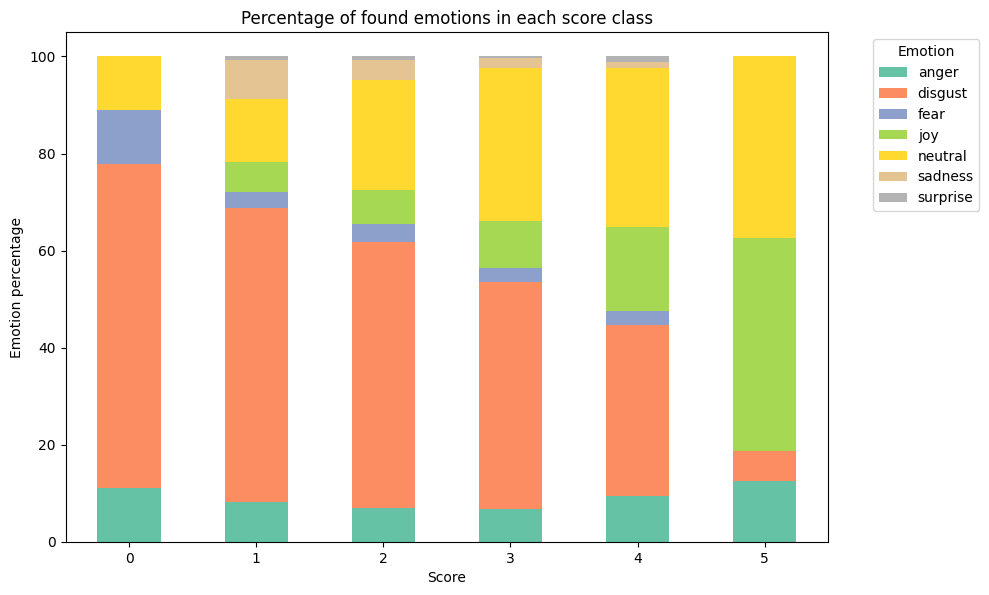

Spearman correlation for emotions by score: 
(if p value < 0.05 we can say that a change in score, introducted a predictable increase or decrease in the percentage for that emotion) 
          Spearman correlation   p-value
anger                 0.200000  0.704000
disgust              -1.000000  0.000000
fear                 -0.942857  0.004805
joy                   1.000000  0.000000
neutral               1.000000  0.000000
sadness              -0.289886  0.577352
surprise              0.115954  0.826848


In [5]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Compute counts for each score and emotion
emotion_counts = emotion_data.groupby(['score'])["max_feel"].value_counts().unstack(fill_value=0)
# Then their percentage in each score class
emotion_percentages = emotion_counts.div(emotion_counts.sum(axis=1), axis=0) * 100

emotion_percentages.plot(kind='bar', stacked=True, colormap="Set2", figsize=(10, 6))
plt.title("Percentage of found emotions in each score class")
plt.xlabel("Score")
plt.ylabel("Emotion percentage")
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

emotion_percentages = emotion_percentages.reset_index()

# Compute the spearman correlation for each emotion between its percentage and its score
spearman_results = {}
for emotion in emotion_counts.columns:
    spearman_corr, p_value = stats.spearmanr(emotion_percentages['score'], emotion_percentages[emotion])
    spearman_results[emotion] = {'Spearman correlation': spearman_corr, 'p-value': p_value}

spearman_df = pd.DataFrame(spearman_results).T
print("Spearman correlation for emotions by score: ")
print("(if p value < 0.05 we can say that a change in score, introducted a predictable increase or decrease in the percentage for that emotion) ")
print(spearman_df)


We can therefore use this model to get negative reviews even though the review are positive by filtering on emotions as depicted below where we are seaching for reviews that are classified as sad. We observe that the review are of course positive but still have some complaint or advice for improvement.

We can then aggregate on specific parts of the sentence and beer name to see the parts of sentences where the complaints are described for each beer

In [6]:
emotion_data[((emotion_data["score"] == 5) | (emotion_data["score"] == 4)) 
             & (emotion_data["max_feel"] == "sadness")]["review"].iloc[:10].tolist()

['A bit mnah mnah in aftertaste and tchup tchup roast but the khhhhhh thickness feels fnnnnnnn ',
 'from cellar at standing order ... deep red brown... thin lacing ... light meaty ... big chocolate nose ... still little green ... but good solid roast ... little chocolate ... little woody ... light hop in finish ... tk 2 dark red brown ... creamy tan head ... soft roast malts ... thin roast ... light sourness... roast malt ',
 'Bottle shared at green sheep. Hazy golden colour. Nose is citruss and zest. Taste is also citrussy, zesty, with a nice bitter finish. Sadly the aroma faded quickly. Then it was just a medium bitter ipa. ',
 'Cask, The Crown, Belfast.  Cloudy somewhat gloomy appearance, think it was brown, but hard to tell under those gas lamps...Some nice fragrant hops in the aroma, with caramel malt and nuts too. Similar themes resonated in the flavour which was surprisingly complex.  Dryish,  gently bitter finish.  Really quite good. ',
 " 500ml bottle, LOT 1010, BB Feb 2015   

In [ ]:
import re
def split_review(review):
    return re.split('\\;|\\,|\\.', review) # tokenize on sentences (by . , or ;)

# Split each review and create a new DataFrame, keeping 'beer_name' with each review
split_data = []
for idx, row in emotion_data[((emotion_data["score"] == 5) | (emotion_data["score"] == 4))].iterrows():
    review_chunks = split_review(row['review']) 
    for chunk in review_chunks:
        split_data.append({'beer_name': row['beer_name'], 'review': chunk})

split_df = pd.DataFrame(split_data)

token_emotions = emotion_sentiment(split_df)

In [ ]:
token_emotions[(token_emotions["max_feel"] == "sadness")]["review"].iloc[:20].tolist()

[' Appearance dark with cream head',
 ' the body black',
 ' Pours slightly hazy dark golden with an off-white head',
 ' Not worth the 4',
 ' disappointing for a local',
 ' earthy dryness',
 ' dry and earthy',
 '[email\xa0protected]/*  */dirty hazy murky ruby with big pine pithy nose',
 ' heavy',
 ' Pours dark red with no head',
 ' Opaque murky red color',
 ' 2016 (Sunday sesh',
 ' pithy',
 ' chalky',
 ' Finishes chalky melon and a decent citrusy grape buzz on the linger',
 ' pithy',
 ' quite cloudy and a little deep orange color',
 ' a bit unfermented',
 ' Poor dark as hell with a not so long lasting deep brown head',
 ' a bit weedy']

In [ ]:
beer_name = "Brewerkz Black Pig "
token_emotions[(token_emotions["max_feel"] == "sadness") & (token_emotions["beer_name"] == beer_name)]["review"].iloc[:20].tolist()

['Draught at the Taphouse by BrewerkzThe color is dark chestnut',
 ' a bit dusty and feety',
 ' without being too ashy']

##### NEGATIVITY SCORE

In [ ]:
from src.models import polarity_sentiment

negative_reviews = polarity_sentiment(emotion_data)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [13]:
top_negative_rev = (-negative_reviews[negative_reviews["polarity"] != 0.0]["polarity"]).argsort()

In [14]:
# 10 most negative reviews according to our model
negative_reviews[negative_reviews["polarity"] != 0.0]["review"].iloc[top_negative_rev[:10]].tolist()

["What was I doing?!?!?!? It is all mike lelevier's fault. He made me drink this azz beer. I come to alaska and drink this. So sorry. Not much better than a Panama! ",
 'This is a terrible beer and should be avoided at all costs! The ginseng is so overpowering and gross that it totally kills this beer. Some things just should not be infused into beer! ',
 'oh wow, this is awful. Aroma and flavour smacks of adjuncts. Crappy vegetal, grainy flavour, blech, bad stuff.  ',
 "clear and bad. bad taste.  i'd prefer less taste.barnyard, basement aromas, rotten eggs, cough drop, skunky, ass. ",
 'not very good at all. looks nice, but tastes awful. golden in colour, big white head, horrible taste.  ',
 "Amber coloured with a slighty tinted head of foam. Much too hoppy and far too bitter. It's really dry as well. Doesn't sit well on the palate at all. It's not an enjoyable ale. ",
 'Can from FairPrice in Singapore. Golden pour with a huge white head. Plastic, rotten veggies, a drier finish - this

In [15]:
# 10 most "positive" reviews (among negatives) according to our model
negative_reviews[negative_reviews["polarity"] != 0.0]["review"].iloc[top_negative_rev[-10:]].tolist()

["Not much to say...it's beer, but definitely nothing special. If I was living in Singapore and this was the only beer around, I'd love it. Since I don't, it's not exactly my top pick. ",
 'Hate to sound like I am harsh on this one, but i really expected more. The aroma is slight sour chocolate and this follows the beer the whole way through. The flavour profile is sour cherry-chocolate that moves in to a brief bitter phase and finishes with lingering sour/bitter chocolate. It isn’t infected, just seems to be perhaps a bit too strong (never thought i’d say that but there you go) a bit of restraint may have balanced this in to a truly great beer. ',
 'pale, light golden colour.  A sweet fruitiness to it, like a british ale gone bad.  Too fruity, needs more hops.  ',
 'No Head, No Aroma. Really just an innoffensive Alcohol Delivery System. Nothing bad, nothing great either. ',
 "A pale pale lager with an unremarkable nose and taste.  Only thing better than an American Bud is the label is

We observe a change in vocabulary used between the two lists of reviews, indicating the model is capable of finding reviews that use a more negative vocabulary.

##### 10 % across beers

In [16]:
# Here are the 10 % worst reviews 

thresholds = emotion_data.groupby("beer_name")["score"].quantile(0.1)

# We get the 10 % lowest score review by adding the threshold column to each beer and comparing the scores for each review to the treshold
low_score_reviews = emotion_data.join(thresholds, on="beer_name", rsuffix="_threshold")
low_score_reviews = low_score_reviews[low_score_reviews["score"] <= low_score_reviews["score_threshold"]]

low_score_reviews = low_score_reviews.drop(columns=["score_threshold"])

print(low_score_reviews)

                                                 review  score  \
0     Puszka 0,33l dzięki Christoph . Kolor jasnozło...      2   
1     Cerveza pale lager gabonesa. MÃ¡s floja que la...      2   
2     Kolor- złoty, klarowny. Piana - drobna, średni...      2   
3     Botella, de GabÃ³n regalo familiar.31/01/2015C...      2   
4     Many thanks for this beer to Erzengel. Pours l...      2   
...                                                 ...    ...   
5835  This beer finish is dry, medium fullness and s...      1   
5842  Basically water. Almost no aroma. Bitterness v...      1   
5865  Super-clear and golden-straw in color. Has a q...      1   
5875        Bland with a sharp, unpleasant bitterness.       1   
5878  Re-Rate 05/14/02: Clear gold in color, a minim...      0   

                beer_name     anger   disgust      fear       joy   neutral  \
0       33 Export (Gabon)  0.089115  0.080007  0.407518  0.051236  0.224784   
1     Castel Beer (Gabon)  0.066735  0.203951  0.

In [17]:
# Emotions percentage in 10 % low review
low_score_reviews.groupby("beer_name")["max_feel"].value_counts(normalize=True) * 100

beer_name             max_feel
33 Export (Gabon)     fear        100.000000
ABC Extra Stout       disgust      47.899160
                      neutral      29.411765
                      anger         8.403361
                      fear          6.722689
                                     ...    
Whitewater Solstice   disgust      73.684211
                      neutral      10.526316
                      joy          10.526316
                      anger         5.263158
Whitewater St Donard  joy         100.000000
Name: proportion, Length: 929, dtype: float64

In [18]:
# Emotions percentage in all reviews
emotion_data.groupby("beer_name")["max_feel"].value_counts(normalize=True) * 100

beer_name             max_feel
33 Export (Gabon)     fear        100.000000
ABC Extra Stout       disgust      42.000000
                      neutral      27.500000
                      joy          11.500000
                      anger        10.500000
                                     ...    
Whitewater Solstice   disgust      73.684211
                      joy          10.526316
                      neutral      10.526316
                      anger         5.263158
Whitewater St Donard  joy         100.000000
Name: proportion, Length: 1307, dtype: float64